
# Setting up the ENV

In [ ]:
%%capture
# Download this library if you dont have
!pip install chart-studio
!pip install missingpy
!pip install sklearn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, model_selection, metrics
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


from plotly.offline import iplot

import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Set Seed to keep results consistant
np.random.seed(200)

# Downloading the csv

In [ ]:
import requests
import pandas as pd

# URL to the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"

# Send a HTTP request to the URL of the Excel file
response = requests.get(url)

# Save the Excel file
with open("credit_card_default.xls", "wb") as f:
    f.write(response.content)

# Reading the CSV

In [ ]:
# Load data into a DataFrame
df = pd.read_excel("credit_card_default.xls", header=1)

In [ ]:
# Display first few rows of the DataFrame
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [ ]:
# Display basic statistics of the DataFrame
print(df.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

In [ ]:
# Check for null values in the DataFrame
print(df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [ ]:
# Example: Handling missing values by removing rows containing any
df_cleaned = df.dropna()

# Cleaning Data

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df_cleaned.shape

(30000, 25)

# Data Visualisation

Univariate Analysis

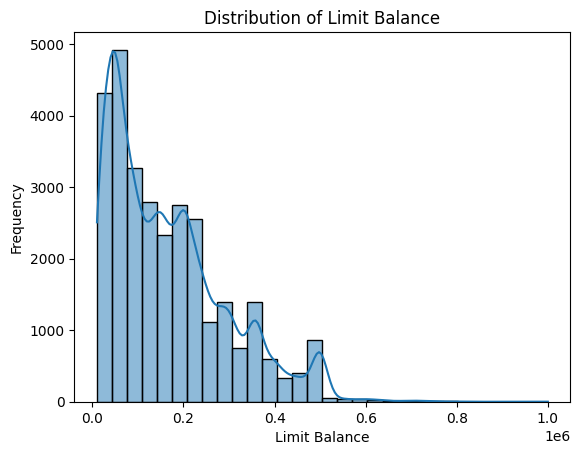

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of 'LIMIT_BAL'
sns.histplot(df_cleaned['LIMIT_BAL'], bins=30, kde=True)
plt.title('Distribution of Limit Balance')
plt.xlabel('Limit Balance')
plt.ylabel('Frequency')
plt.show()

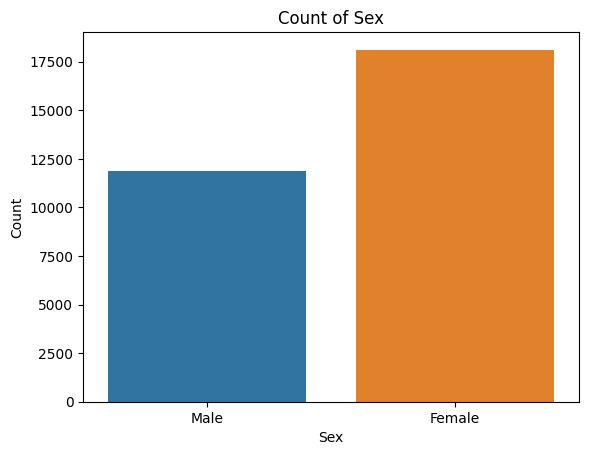

In [ ]:
# Count plot of 'SEX'
sns.countplot(x='SEX', data=df_cleaned)
plt.title('Count of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Male', 'Female'])
plt.show()

Bivariate Analysis

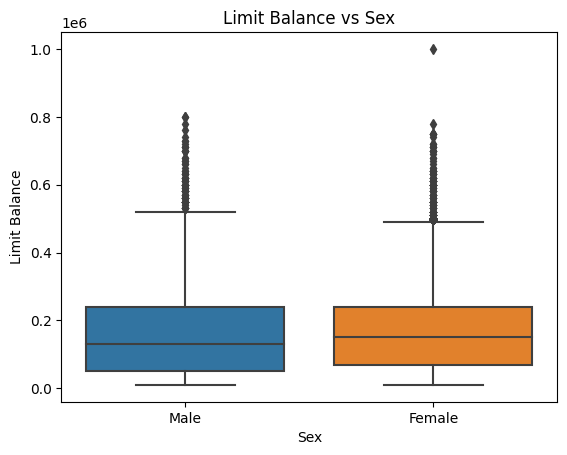

In [ ]:
# Box plot of 'LIMIT_BAL' vs 'SEX'
sns.boxplot(x='SEX', y='LIMIT_BAL', data=df_cleaned)
plt.title('Limit Balance vs Sex')
plt.xlabel('Sex')
plt.ylabel('Limit Balance')
plt.xticks(ticks=[0,1], labels=['Male', 'Female'])
plt.show()

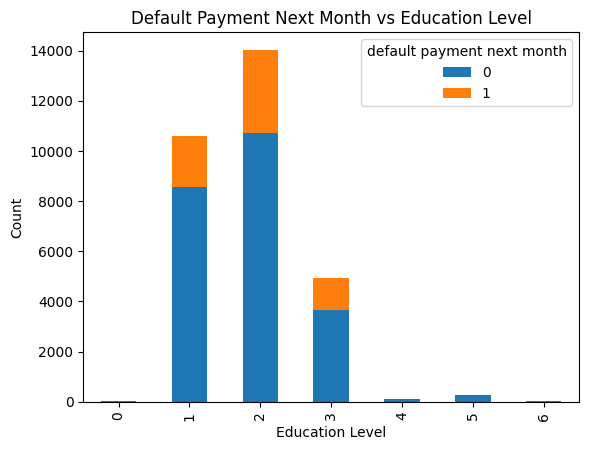

In [ ]:
# Stacked bar plot of 'default payment next month' vs 'EDUCATION'
pd.crosstab(df_cleaned['EDUCATION'], df_cleaned['default payment next month']).plot(kind='bar', stacked=True)
plt.title('Default Payment Next Month vs Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

Multivariate Analysis

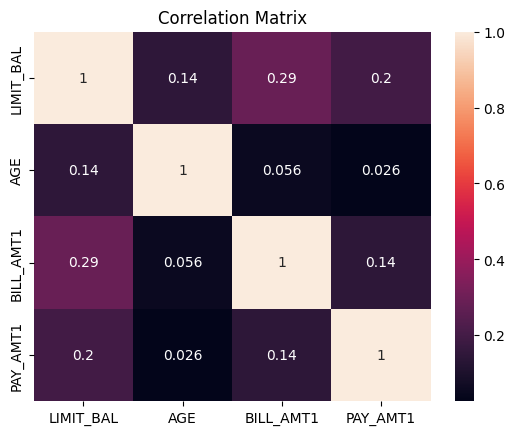

In [ ]:
# Correlation matrix among 'LIMIT_BAL', 'AGE', 'BILL_AMT1' and 'PAY_AMT1'
selected_columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']
corr_matrix = df_cleaned[selected_columns].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


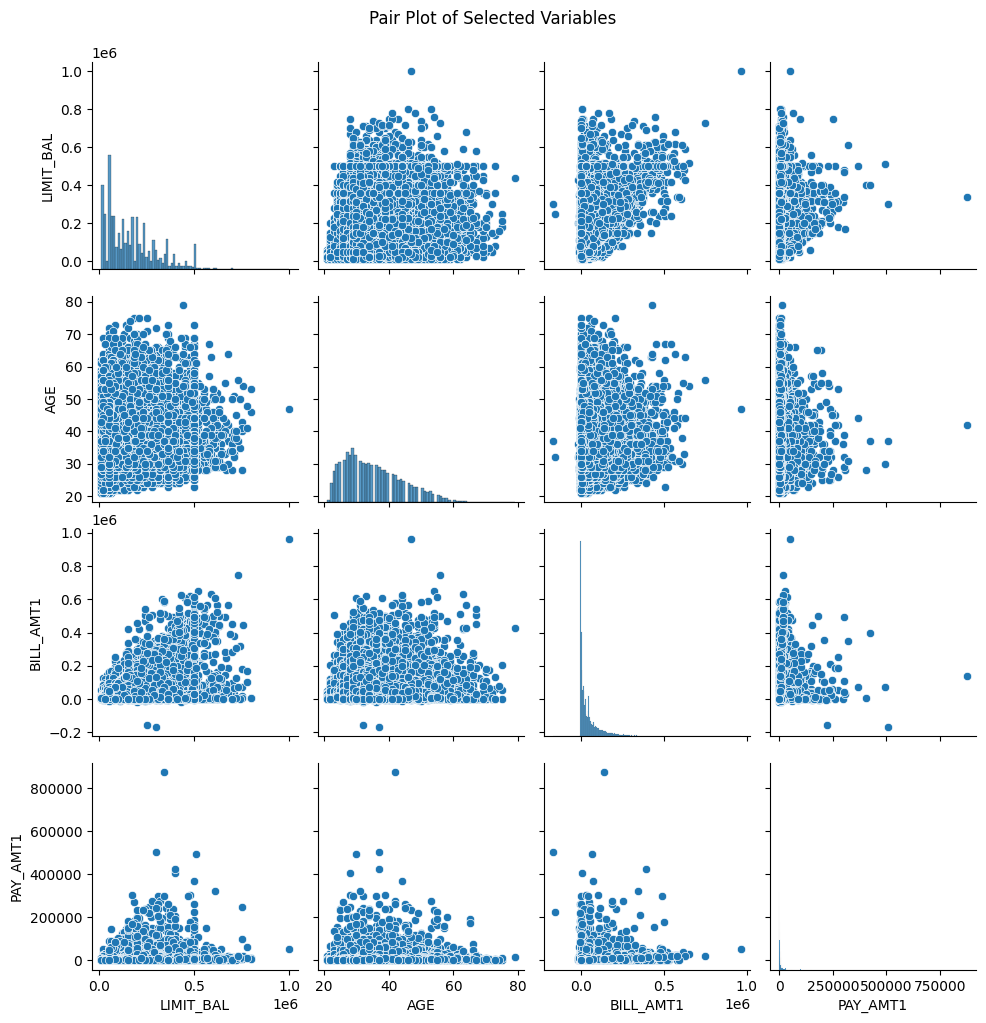

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair Plot for Selected Variables
selected_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']
sns.pairplot(df_cleaned[selected_vars])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

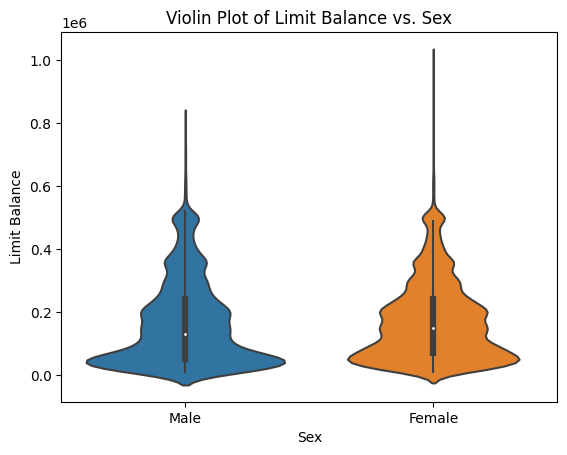

In [ ]:
# Violin Plot of 'LIMIT_BAL' vs. 'SEX'
sns.violinplot(x='SEX', y='LIMIT_BAL', data=df_cleaned)
plt.title('Violin Plot of Limit Balance vs. Sex')
plt.xlabel('Sex')
plt.xticks(ticks=[0,1], labels=['Male', 'Female'])
plt.ylabel('Limit Balance')
plt.show()

# Removing Outliers

In [ ]:
import numpy as np

# IQR Method
Q1 = df_cleaned['LIMIT_BAL'].quantile(0.25)
Q3 = df_cleaned['LIMIT_BAL'].quantile(0.75)
IQR = Q3 - Q1

# Defining limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_cleaned[(df_cleaned['LIMIT_BAL'] < lower_limit) | (df_cleaned['LIMIT_BAL'] > upper_limit)]

# Handling outliers
df_no_outliers = df_cleaned[(df_cleaned['LIMIT_BAL'] >= lower_limit) & (df_cleaned['LIMIT_BAL'] <= upper_limit)]


In [ ]:
# Copy the data without outliers to a new DataFrame for model building
df_model = df_no_outliers.copy()

# Basic check to ensure the new DataFrame is ready for modeling
print(df_model.head())
print(f"The shape of the modeling data is: {df_model.shape}")

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [ ]:
df_model.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Spliting the DataSet + Running the Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Drop ID and target variable
X = df_model.drop(['default payment next month', 'ID'], axis=1)
y = df_model['default payment next month']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def train_evaluate_model(model, model_name, param_grid, X_train, X_test, y_train, y_test):
    # Grid Search for Hyperparameter Tuning
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Display Hyperparameter Search Results
    print(f"\n{model_name} - Classification report for all hyperparameter combinations:")
    for params, mean_score, std_score in zip(grid_search.cv_results_['params'],
                                             grid_search.cv_results_['mean_test_score'],
                                             grid_search.cv_results_['std_test_score']):
        print(f"Hyperparameters: {params}")
        print(f"Mean test score: {mean_score:.3f} (std: {std_score:.3f})")

    # Using the Best Model for Prediction
    predictions = grid_search.predict(X_test)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Display Classification Report
    print("\nBest hyperparameters found:", grid_search.best_params_)
    print("Classification report:")
    print(classification_report(y_test, predictions))

    results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    return results

# Store Results
results_df = pd.DataFrame()

In [ ]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

results_knn = train_evaluate_model(model_knn, 'K-Nearest Neighbors', param_grid_knn, X_train, X_test, y_train, y_test)
results_df = results_df.append(results_knn, ignore_index=True)

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_decisiontree = DecisionTreeClassifier(random_state=42)
param_grid_decisiontree = {'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}

result_decisiontree = train_evaluate_model(model_decisiontree, 'Decision Tree', param_grid_decisiontree, X_train, X_test, y_train, y_test)
results_df = results_df.append(result_decisiontree, ignore_index=True)

In [ ]:
# ADA Boost
from sklearn.ensemble import AdaBoostClassifier


# Create a base decision tree model
base_model = DecisionTreeClassifier(random_state=42)

model_adaboost =  AdaBoostClassifier(estimator=base_model, random_state=42)
param_grid_adaboost = {'n_estimators': [50, 100],
              'learning_rate': [0.1, 1],
              'estimator__max_depth': [1, 2]}

result_adaboost = train_evaluate_model(model_adaboost, 'ADA Boost', param_grid_adaboost, X_train, X_test, y_train, y_test)
results_df = results_df.append(result_adaboost, ignore_index=True)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

result_lr = train_evaluate_model(model_lr, 'Logistic Regression', param_grid_lr, X_train, X_test, y_train, y_test)
results_df = results_df.append(result_lr, ignore_index=True)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [100, 200],
              'max_depth': [5, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2]}

result_rf = train_evaluate_model(model_rf, 'Random Forest', param_grid_rf, X_train, X_test, y_train, y_test)
results_df = results_df.append(result_rf, ignore_index=True)

In [ ]:
# SVM
from sklearn.svm import SVC

model_svc = SVC(random_state=42)
param_grid_svc = {'C': [0.1, 1],
              'kernel': ['linear', 'rbf', 'poly']}

result_svc = train_evaluate_model(model_svc, 'SVM', param_grid_svc, X_train, X_test, y_train, y_test)
results_df = results_df.append(result_svc, ignore_index=True)

# Reg Algo

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Drop ID and target variable
X = df_model.drop(['default payment next month', 'ID'], axis=1)
y = df_model['default payment next month']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling - useful for certain regression models
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def train_evaluate_model_reg(model, model_name, param_grid, X_train, X_test, y_train, y_test):
    # Grid Search for Hyperparameter Tuning
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Display Hyperparameter Search Results
    print(f"\n{model_name} - Results for all hyperparameter combinations:")
    for params, mean_score, std_score in zip(grid_search.cv_results_['params'],
                                             grid_search.cv_results_['mean_test_score'],
                                             grid_search.cv_results_['std_test_score']):
        print(f"Hyperparameters: {params}")
        print(f"Negative Mean Squared Error: {mean_score:.3f} (std: {std_score:.3f})")

    # Using the Best Model for Prediction
    predictions = grid_search.predict(X_test)

    # Evaluation Metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Display Results
    print("\nBest hyperparameters found:", grid_search.best_params_)
    print(f"Mean Squared Error: {mse:.3f}")
    print(f"Mean Absolute Error: {mae:.3f}")
    print(f"R2 Score: {r2:.3f}")

    results = {
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2
    }

    return results

# Store Results
results_df_reg = pd.DataFrame()


In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge

model_ridge = Ridge(random_state=42)
param_grid_ridge = {
    'alpha': [1, 0.1, 0.01, 0.001],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

result_ridge = train_evaluate_model_reg(model_ridge, 'Ridge Regression', param_grid_ridge, X_train, X_test, y_train, y_test)
results_df_reg = results_df_reg.append(result_ridge, ignore_index=True)

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42)
param_grid_dt = {
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

result_dt = train_evaluate_model_reg(model_dt, 'Decision Tree Regression', param_grid_dt, X_train, X_test, y_train, y_test)
results_df_reg = results_df_reg.append(result_dt, ignore_index=True)

In [ ]:
import pandas as pd

# Data for each model
models_data = [
    {
        'Model': 'Decision Tree Regression',
        'Best hyperparameters': "{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}",
        'MSE': 0.141,
        'MAE': 0.268,
        'R2 Score': 0.178
    },
    {
        'Model': 'Ridge Regression',
        'Best hyperparameters': "{'alpha': 1, 'solver': 'lsqr'}",
        'MSE': 0.150,
        'MAE': 0.306,
        'R2 Score': 0.124
    }
]



# Store Results
results_df_reg = pd.DataFrame(models_data)

results_df_reg


,Model,Best hyperparameters,MSE,MAE,R2 Score
0,Decision Tree Regression,"{'max_depth': 10, 'max_features': None, 'min_s...",0.141,0.268,0.178
1,Ridge Regression,"{'alpha': 1, 'solver': 'lsqr'}",0.150,0.306,0.124


In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

result_rf = train_evaluate_model_reg(model_rf, 'Random Forest Regression', param_grid_rf, X_train, X_test, y_train, y_test)
results_df_reg = results_df_reg.append(result_rf, ignore_index=True)

# Additonal Algos

In [ ]:
%%capture
!pip install --upgrade tensorflow
!pip install keras

In [ ]:
import pandas as pd
from tensorflow.keras import layers, models
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    model = Sequential([
        Dense(32, activation='relu', input_dim=X_train.shape[1]),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Assuming you've preprocessed the data and prepared features (X) and labels (y)
# and you've split and standardized X_train, X_test, y_train, y_test as in your original script

def train_evaluate_model(model, model_name, param_grid, X_train, X_test, y_train, y_test):
    # Grid Search for Hyperparameter Tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Display Hyperparameter Search Results
    print(f"\n{model_name} - Classification report for all hyperparameter combinations:")
    for params, mean_score, std_score in zip(grid_search.cv_results_['params'],
                                             grid_search.cv_results_['mean_test_score'],
                                             grid_search.cv_results_['std_test_score']):
        print(f"Hyperparameters: {params}")
        print(f"Mean test score: {mean_score:.3f} (std: {std_score:.3f})")

    # Using the Best Model for Prediction
    predictions = grid_search.predict(X_test)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Display Classification Report
    print("\nBest hyperparameters found:", grid_search.best_params_)
    print("Classification report:")
    print(classification_report(y_test, predictions))

    results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    return results

# Store Results
results_df = pd.DataFrame()

# Neural Network
model_nn = KerasClassifier(build_fn=create_model, verbose=0)
param_grid_nn = {'batch_size': [10, 20, 40],
                 'epochs': [10, 50],
                 'optimizer': ['adam', 'rmsprop']}

result_nn = train_evaluate_model(model_nn, 'Neural Network', param_grid_nn, X_train, X_test, y_train, y_test)
results_df = results_df.append(result_nn, ignore_index=True)


In [ ]:
results_df

In [ ]:
results_df_reg

# Storing Results in Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
results_df.to_csv('/content/drive/My Drive/4730/A1/results_df.csv', index=False)

# Assuming df is your DataFrame
results_df_reg.to_csv('/content/drive/My Drive/4730/A1/results_df_reg.csv', index=False)

In [ ]:
results_df = pd.read_csv('/content/drive/My Drive/4730/A1/results_df.csv')

results_df_reg = pd.read_csv('/content/drive/My Drive/4730/A1/results_df_reg.csv')

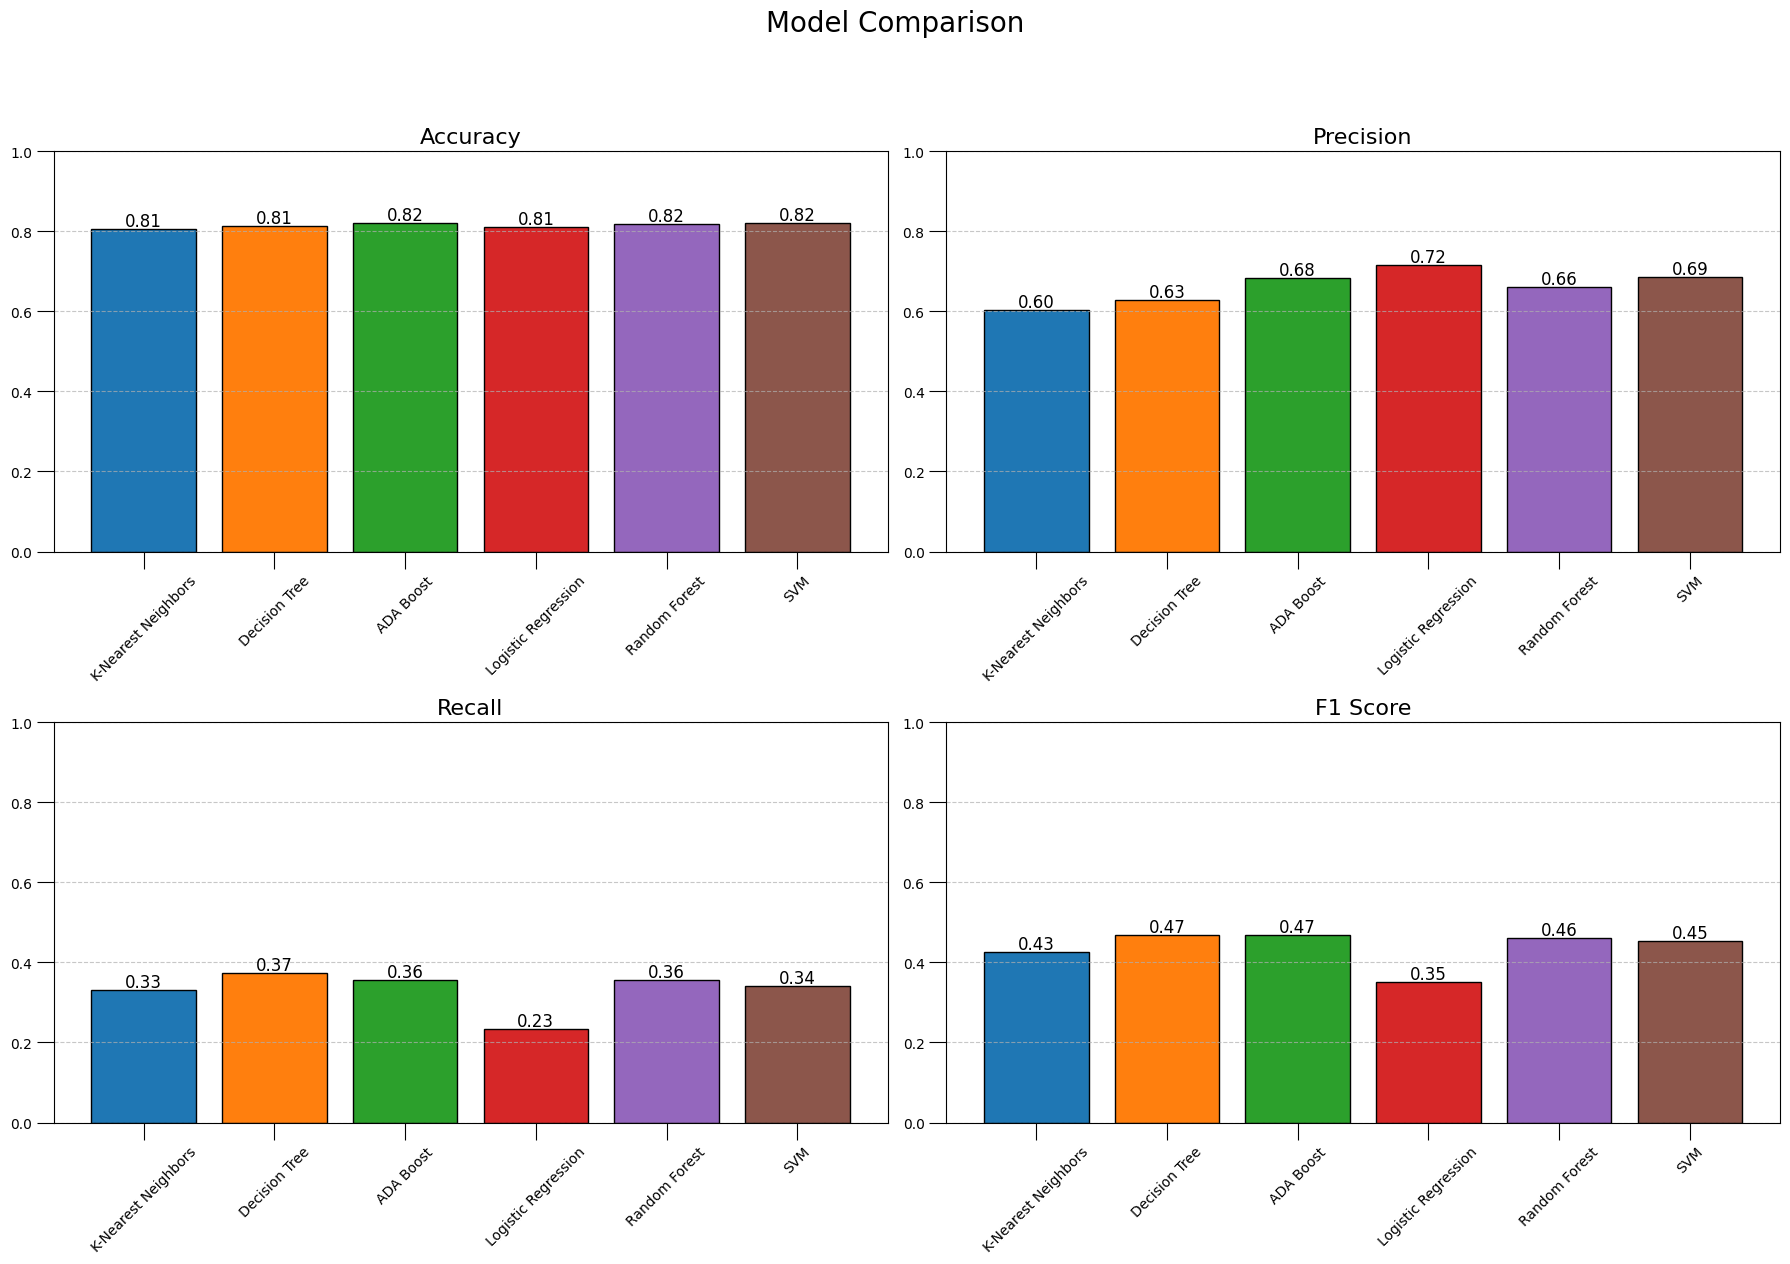

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define a color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Model Comparison', fontsize=20, y=1.05)

# Flatten the 2x2 subplots matrix
axs = axs.flatten()

# Define metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create bar plots for each metric
for i, metric in enumerate(metrics):
    axs[i].bar(results_df['Model'], results_df[metric], color=colors, edgecolor='black')
    axs[i].set_title(metric, fontsize=16)
    axs[i].set_ylim(0, 1)  # to keep the scores readable
    axs[i].tick_params(axis='x', rotation=45, size=12)  # rotate x-axis labels for better readability
    axs[i].tick_params(axis='y', size=12)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Add data labels
    for index, value in enumerate(results_df[metric]):
        axs[i].text(index, value + 0.02, f"{value:.2f}", ha='center', va='center', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

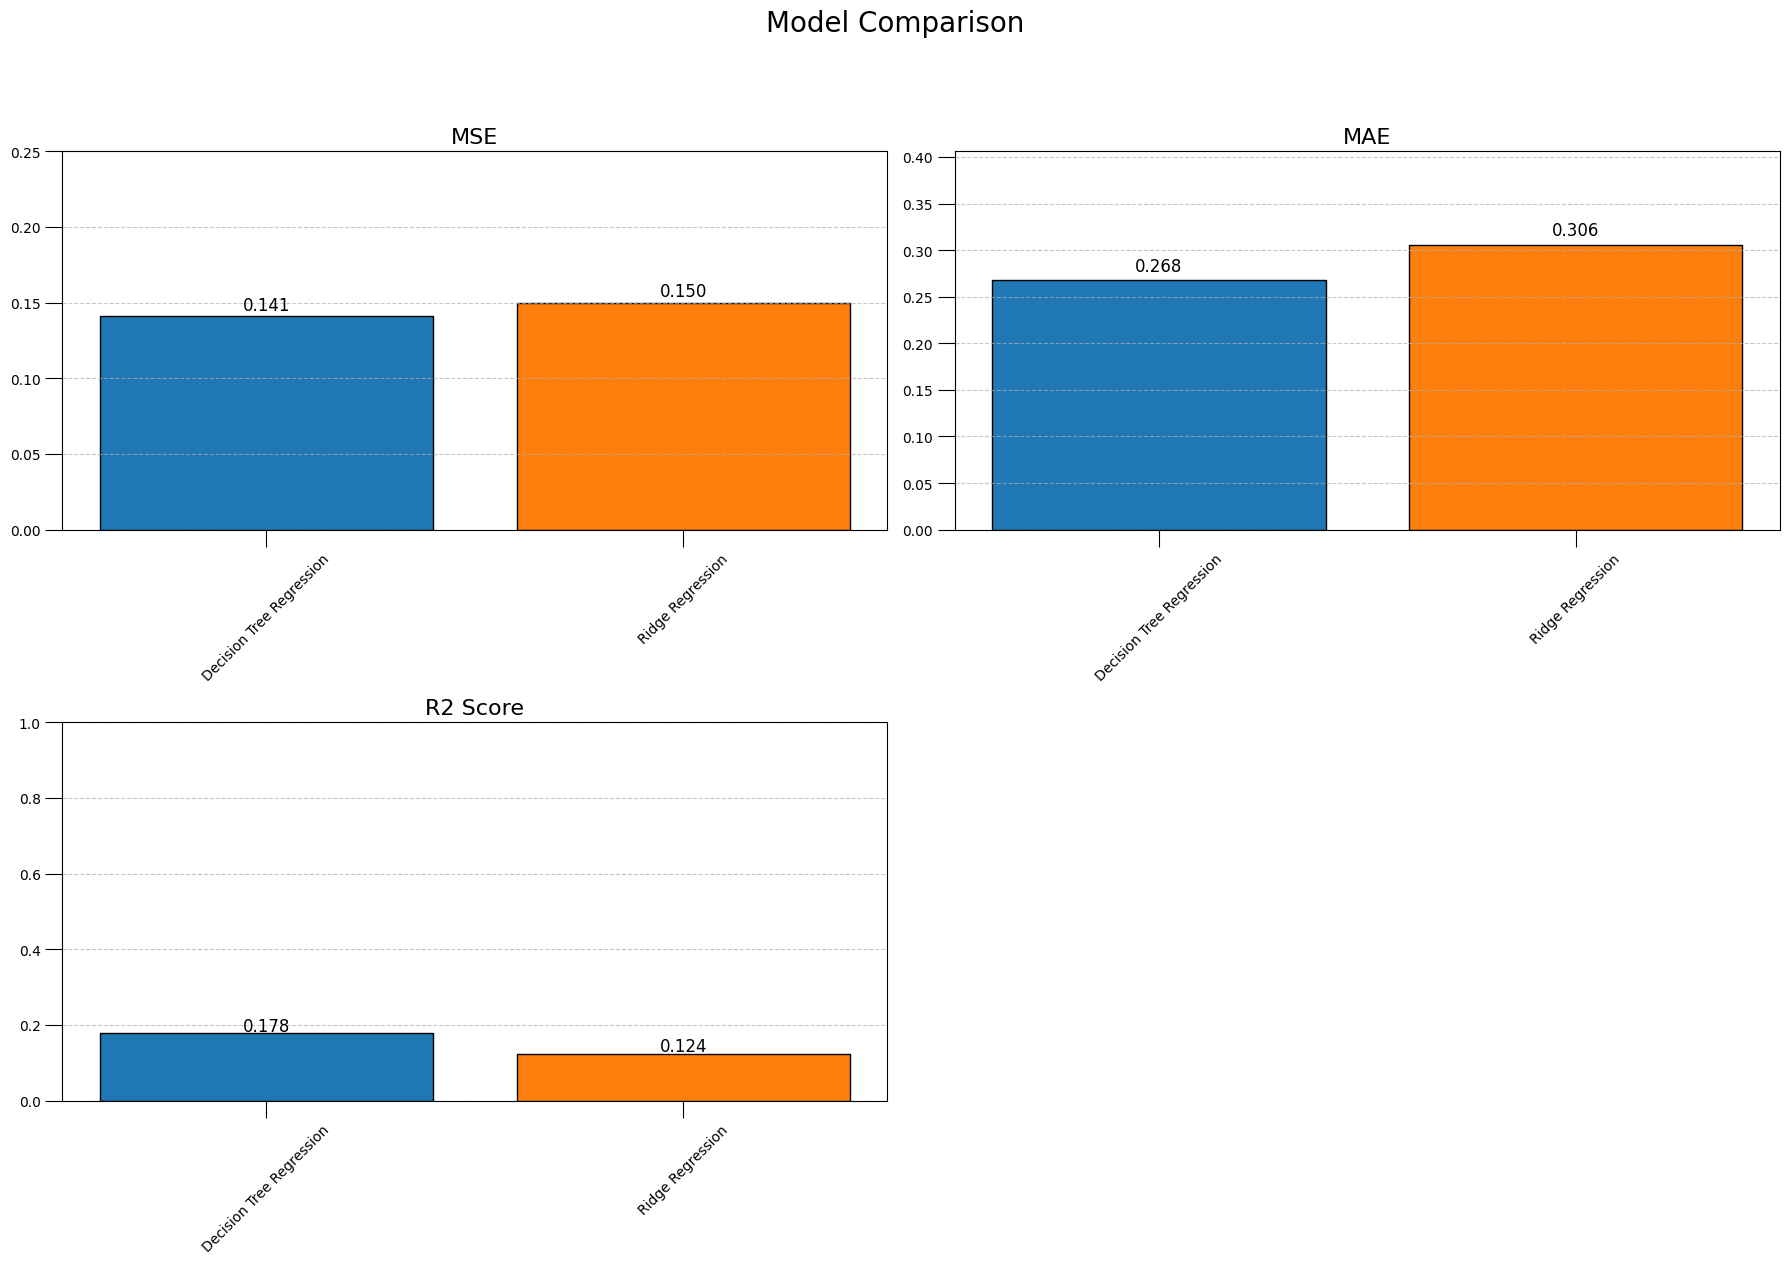

In [ ]:
import matplotlib.pyplot as plt

# Define a color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Model Comparison', fontsize=20, y=1.05)

# Flatten the 2x2 subplots matrix
axs = axs.flatten()

# Define metrics
metrics = ['MSE', 'MAE', 'R2 Score']

# Create bar plots for each metric
for i, metric in enumerate(metrics):
    axs[i].bar(results_df_reg['Model'], results_df_reg[metric], color=colors, edgecolor='black')
    axs[i].set_title(metric, fontsize=16)

    # Set y-axis limit based on metric range
    if metric == 'R2 Score':  # R2 Score range is usually between 0 and 1
        axs[i].set_ylim(0, 1)
    else:  # For MSE and MAE, we don't set the upper limit to 1 as errors can exceed 1
        axs[i].set_ylim(0, max(results_df_reg[metric]) + 0.1)  # Slightly above the highest error

    axs[i].tick_params(axis='x', rotation=45, size=12)  # rotate x-axis labels for better readability
    axs[i].tick_params(axis='y', size=12)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Add data labels
    for index, value in enumerate(results_df_reg[metric]):
        # Adjust the position of the data label depending on the metric's range
        label_pos = value + 0.02 if metric == 'R2 Score' else value + (max(results_df_reg[metric]) * 0.05)
        axs[i].text(index, label_pos, f"{value:.3f}", ha='center', va='center', fontsize=12)

# Hide the empty subplot in the 2x2 grid
axs[3].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Provided data
data = {
    'KNN': [
        {'n_neighbors': 3, 'p': 1, 'weights': 'uniform', 'mean_test_score': 0.770, 'std_test_score': 0.004},
        {'n_neighbors': 3, 'p': 1, 'weights': 'distance', 'mean_test_score': 0.766, 'std_test_score': 0.005},
        {'n_neighbors': 3, 'p': 2, 'weights': 'uniform', 'mean_test_score': 0.774, 'std_test_score': 0.004},
        {'n_neighbors': 3, 'p': 2, 'weights': 'distance', 'mean_test_score': 0.769, 'std_test_score': 0.005},
        {'n_neighbors': 5, 'p': 1, 'weights': 'uniform', 'mean_test_score': 0.788, 'std_test_score': 0.002},
        {'n_neighbors': 5, 'p': 1, 'weights': 'distance', 'mean_test_score': 0.784, 'std_test_score': 0.002},
        {'n_neighbors': 5, 'p': 2, 'weights': 'uniform', 'mean_test_score': 0.790, 'std_test_score': 0.003},
        {'n_neighbors': 5, 'p': 2, 'weights': 'distance', 'mean_test_score': 0.786, 'std_test_score': 0.004},
        {'n_neighbors': 7, 'p': 1, 'weights': 'uniform', 'mean_test_score': 0.797, 'std_test_score': 0.002},
        {'n_neighbors': 7, 'p': 1, 'weights': 'distance', 'mean_test_score': 0.793, 'std_test_score': 0.002},
        {'n_neighbors': 7, 'p': 2, 'weights': 'uniform', 'mean_test_score': 0.800, 'std_test_score': 0.002},
        {'n_neighbors': 7, 'p': 2, 'weights': 'distance', 'mean_test_score': 0.796, 'std_test_score': 0.003},
        {'n_neighbors': 9, 'p': 1, 'weights': 'uniform', 'mean_test_score': 0.802, 'std_test_score': 0.003},
        {'n_neighbors': 9, 'p': 1, 'weights': 'distance', 'mean_test_score': 0.799, 'std_test_score': 0.003},
        {'n_neighbors': 9, 'p': 2, 'weights': 'uniform', 'mean_test_score': 0.804, 'std_test_score': 0.002},
        {'n_neighbors': 9, 'p': 2, 'weights': 'distance', 'mean_test_score': 0.800, 'std_test_score': 0.003}
    ],
    'Decision Tree': [
        {'max_depth': 5, 'min_samples_split': 2, 'mean_test_score': 0.819, 'std_test_score': 0.003},
        {'max_depth': 5, 'min_samples_split': 5, 'mean_test_score': 0.819, 'std_test_score': 0.003},
        {'max_depth': 5, 'min_samples_split': 10, 'mean_test_score': 0.819, 'std_test_score': 0.003},
        {'max_depth': 10, 'min_samples_split': 2, 'mean_test_score': 0.807, 'std_test_score': 0.003},
        {'max_depth': 10, 'min_samples_split': 5, 'mean_test_score': 0.806, 'std_test_score': 0.003},
        {'max_depth': 10, 'min_samples_split': 10, 'mean_test_score': 0.807, 'std_test_score': 0.003},
        {'max_depth': 15, 'min_samples_split': 2, 'mean_test_score': 0.783, 'std_test_score': 0.002},
        {'max_depth': 15, 'min_samples_split': 5, 'mean_test_score': 0.784, 'std_test_score': 0.001},
        {'max_depth': 15, 'min_samples_split': 10, 'mean_test_score': 0.784, 'std_test_score': 0.002}
    ],
    'ADA Boost': [
        {'estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 50, 'mean_test_score': 0.816, 'std_test_score': 0.003},
        {'estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 100, 'mean_test_score': 0.817, 'std_test_score': 0.003},
        {'estimator__max_depth': 1, 'learning_rate': 1, 'n_estimators': 50, 'mean_test_score': 0.817, 'std_test_score': 0.003},
        {'estimator__max_depth': 1, 'learning_rate': 1, 'n_estimators': 100, 'mean_test_score': 0.817, 'std_test_score': 0.003},
        {'estimator__max_depth': 2, 'learning_rate': 0.1, 'n_estimators': 50, 'mean_test_score': 0.820, 'std_test_score': 0.002},
        {'estimator__max_depth': 2, 'learning_rate': 0.1, 'n_estimators': 100, 'mean_test_score': 0.820, 'std_test_score': 0.002},
        {'estimator__max_depth': 2, 'learning_rate': 1, 'n_estimators': 50, 'mean_test_score': 0.813, 'std_test_score': 0.002},
        {'estimator__max_depth': 2, 'learning_rate': 1, 'n_estimators': 100, 'mean_test_score': 0.807, 'std_test_score': 0.003}
    ],
    'Logistic Regression': [
        {'C': 0.001, 'mean_test_score': 0.800, 'std_test_score': 0.003},
        {'C': 0.01, 'mean_test_score': 0.807, 'std_test_score': 0.004},
        {'C': 0.1, 'mean_test_score': 0.808, 'std_test_score': 0.003},
        {'C': 1, 'mean_test_score': 0.808, 'std_test_score': 0.004},
        {'C': 10, 'mean_test_score': 0.808, 'std_test_score': 0.003},
         {'C': 100, 'mean_test_score': 0.808, 'std_test_score': 0.003}
    ],
    'Random Forest':[
        {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'mean_test_score': 0.815, 'std_test_score': 0.003},
    {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'mean_test_score': 0.815, 'std_test_score': 0.002},
    {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'mean_test_score': 0.815, 'std_test_score': 0.003},
    {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'mean_test_score': 0.815, 'std_test_score': 0.002},
    {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'mean_test_score': 0.815, 'std_test_score': 0.003},
    {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'mean_test_score': 0.815, 'std_test_score': 0.002},
    {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'mean_test_score': 0.815, 'std_test_score': 0.003},
    {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'mean_test_score': 0.815, 'std_test_score': 0.002},
    {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'mean_test_': 2, 'n_estimators': 200, 'mean_test_scoscore': 0.818, 'std_test_score': 0.002},
    {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_splitre': 0.819, 'std_test_score': 0.002},
    {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'mean_test_score': 0.820, 'std_test_score': 0.003},
    {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'mean_test_score': 0.819, 'std_test_score': 0.002},
    {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'mean_test_score': 0.820, 'std_test_score': 0.002},
    {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'mean_test_score': 0.819, 'std_test_score': 0.002},
    {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'mean_test_score': 0.820, 'std_test_score': 0.002},
    {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'mean_test_score': 0.820, 'std_test_score': 0.002}
    ],
    'SVM':[
        {'C': 0.1, 'kernel': 'linear', 'mean_test_score': 0.808, 'std_test_score': 0.002},
    {'C': 0.1, 'kernel': 'rbf', 'mean_test_score': 0.814, 'std_test_score': 0.002},
    {'C': 0.1, 'kernel': 'poly', 'mean_test_score': 0.794, 'std_test_score': 0.001},
    {'C': 1, 'kernel': 'linear', 'mean_test_score': 0.809, 'std_test_score': 0.002},
    {'C': 1, 'kernel': 'rbf', 'mean_test_score': 0.818, 'std_test_score': 0.002},
    {'C': 1, 'kernel': 'poly', 'mean_test_score': 0.803, 'std_test_score': 0.001}
    ]

}


In [ ]:
# Creating the dataframe
df_list = []

for model, hyperparameters in data.items():
    for params in hyperparameters:
        row = {'Model': model}
        row.update(params)  # Add hyperparameter columns
        df_list.append(row)

# Creating a DataFrame
results_extended_df = pd.DataFrame(df_list)

results_extended_df


,Model,n_neighbors,p,weights,mean_test_score,std_test_score,max_depth,min_samples_split,estimator__max_depth,learning_rate,n_estimators,C,min_samples_leaf,mean_test_,mean_test_scoscore,min_samples_splitre,kernel
0,KNN,3.0,1.0,uniform,0.770,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KNN,3.0,1.0,distance,0.766,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KNN,3.0,2.0,uniform,0.774,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KNN,3.0,2.0,distance,0.769,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KNN,5.0,1.0,uniform,0.788,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,SVM,NaN,NaN,NaN,0.814,0.002,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,rbf
57,SVM,NaN,NaN,NaN,0.794,0.001,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,poly
58,SVM,NaN,NaN,NaN,0.809,0.002,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,linear
59,SVM,NaN,NaN,NaN,0.818,0.002,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,rbf


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
results_extended_df.to_csv('/content/drive/My Drive/4730/A1/results_extended_df.csv', index=False)

In [ ]:
results_extended_df = pd.read_csv('/content/drive/My Drive/4730/A1/results_extended_df.csv')

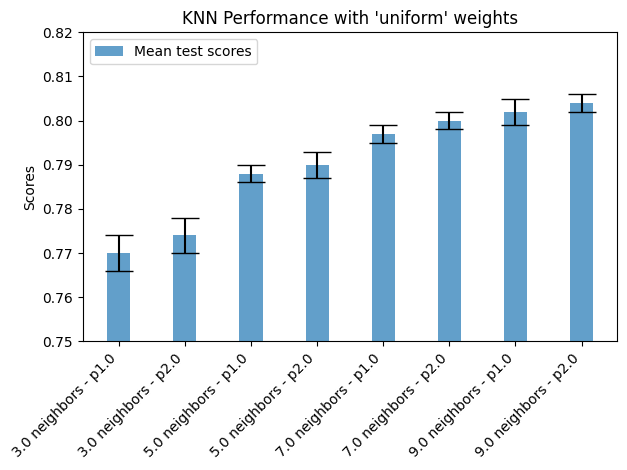

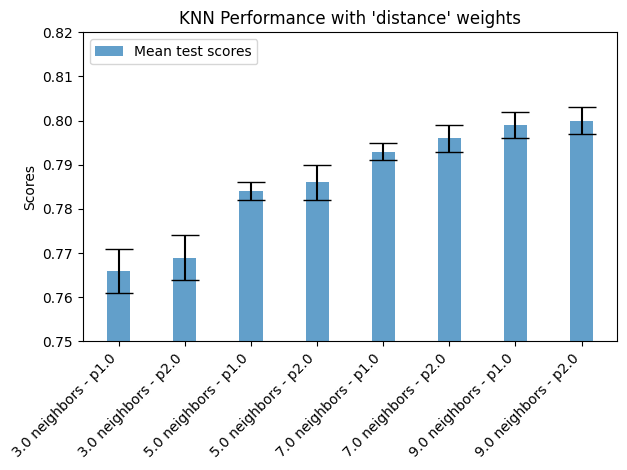

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

KNN_data = results_extended_df.loc[results_extended_df['Model'] == 'KNN']

# If you want to reset the index for the new dataframe, you can do so as follows
KNN_data = KNN_data.reset_index(drop=True)

# Loading into a DataFrame
knn_results = pd.DataFrame(KNN_data)


# Filter the DataFrame for 'uniform' and 'distance' weights
uniform_data = knn_results[knn_results['weights'] == 'uniform']
distance_data = knn_results[knn_results['weights'] == 'distance']

# Function to create the plots
def create_plot(data, title):
    # X-axis labels
    labels = [f"{row['n_neighbors']} neighbors - p{row['p']}" for index, row in data.iterrows()]

    # Y-axis values
    mean_test_scores = data['mean_test_score'].tolist()
    std_test_scores = data['std_test_score'].tolist()

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    bars = ax.bar(x, mean_test_scores, width, yerr=std_test_scores, align='center', alpha=0.7, ecolor='black', capsize=10)

    # Add some text for labels, title and custom x-axis tick labels
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation = 45, ha="right")
    ax.set_ylim([0.75, 0.82])  # Fixed scale for direct comparison

    # Adding the legend and showing the plot
    ax.legend([bars], ['Mean test scores'], loc='upper left')
    plt.tight_layout()
    plt.show()

# Create two plots: one for 'uniform' weights and the other for 'distance' weights
create_plot(uniform_data, "KNN Performance with 'uniform' weights")
create_plot(distance_data, "KNN Performance with 'distance' weights")

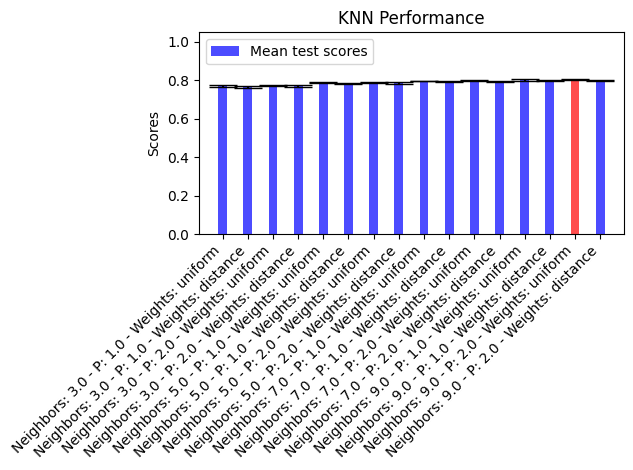

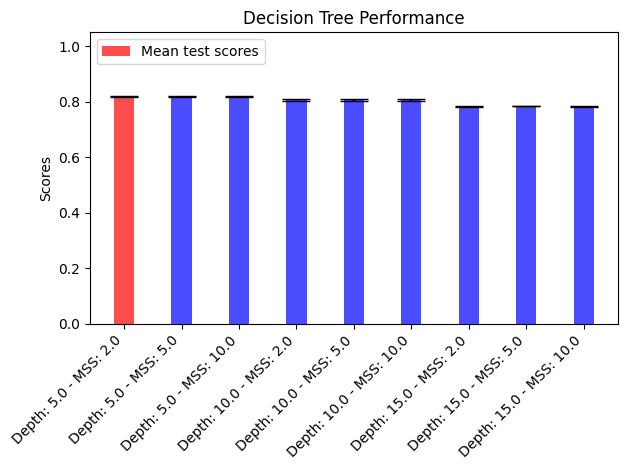

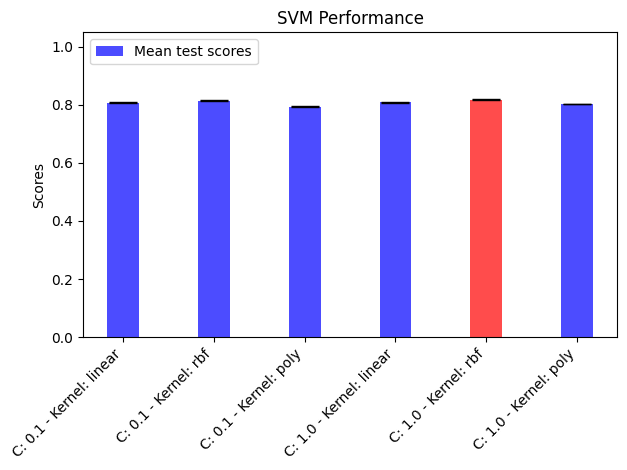

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming results_extended_df is already defined and contains the relevant data

# Generalized function to create plots for any algorithm
def create_plot(data, title, xticklabels):
    # Y-axis values
    mean_test_scores = data['mean_test_score'].tolist()
    std_test_scores = data['std_test_score'].tolist()

    x = np.arange(len(xticklabels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()

    # Find the best score and its index
    best_score_index = mean_test_scores.index(max(mean_test_scores))

    # Assign a color to each bar, but make the best one a different color
    colors = ['blue' if i != best_score_index else 'red' for i in range(len(mean_test_scores))]

    bars = ax.bar(x, mean_test_scores, width, color=colors, yerr=std_test_scores, align='center', alpha=0.7, ecolor='black', capsize=10)

    # Add some text for labels, title and custom x-axis tick labels
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(xticklabels, rotation=45, ha="right")
    ax.set_ylim([0, 1.05])  # Adjust this based on your specific data range

    # Adding the legend and showing the plot
    ax.legend([bars], ['Mean test scores'], loc='upper left')
    plt.tight_layout()
    plt.show()

# KNN
KNN_data = results_extended_df.loc[results_extended_df['Model'] == 'KNN']
KNN_data = KNN_data.reset_index(drop=True)
# Creating xticklabels for KNN
xticklabels = [f"Neighbors: {row['n_neighbors']} - P: {row['p']} - Weights: {row['weights']}" for index, row in KNN_data.iterrows()]
create_plot(KNN_data, "KNN Performance", xticklabels)

# Decision Tree
decision_tree_data = results_extended_df.loc[results_extended_df['Model'] == 'Decision Tree']
decision_tree_data = decision_tree_data.reset_index(drop=True)
# Creating xticklabels for Decision Tree
xticklabels = [f"Depth: {row['max_depth']} - MSS: {row['min_samples_split']}" for index, row in decision_tree_data.iterrows()]
create_plot(decision_tree_data, "Decision Tree Performance", xticklabels)

# SVM
svm_data = results_extended_df.loc[results_extended_df['Model'] == 'SVM']
svm_data = svm_data.reset_index(drop=True)
# Creating xticklabels for SVM
xticklabels = [f"C: {row['C']} - Kernel: {row['kernel']}" for index, row in svm_data.iterrows()]
create_plot(svm_data, "SVM Performance", xticklabels)

# Additional models can be plotted by following the same structure: filtering data, creating xticklabels, and calling the create_plot function.


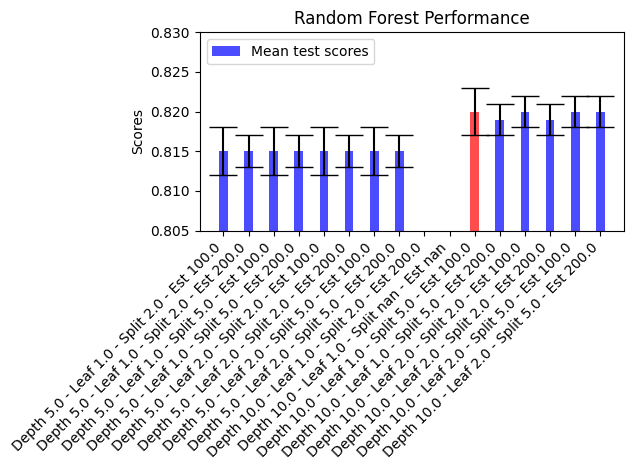

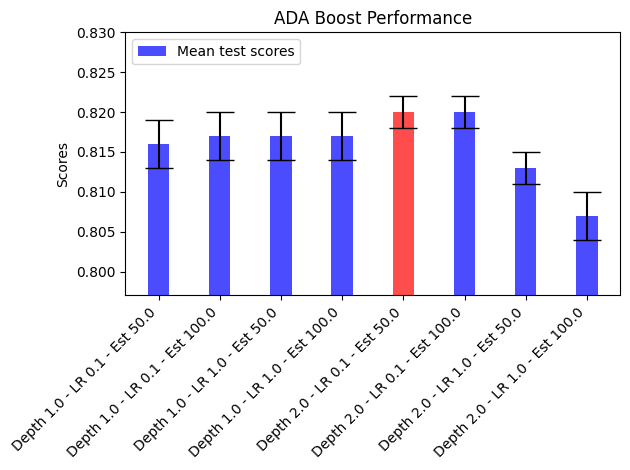

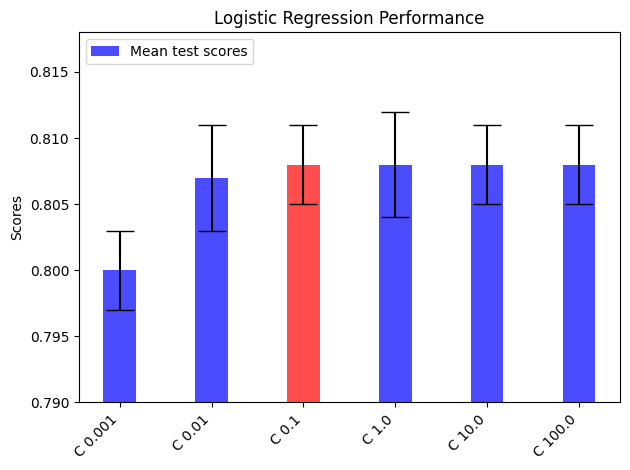

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming results_extended_df is already defined and contains the relevant data

def create_plot(data, title, xticklabels):
    # X-axis labels
    labels = xticklabels

    # Y-axis values
    mean_test_scores = data['mean_test_score'].tolist()
    std_test_scores = data['std_test_score'].tolist()

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()

    # Find the best score and its index
    best_score_index = mean_test_scores.index(max(mean_test_scores))

    # Assign a color to each bar, but make the best one a different color
    colors = ['blue' if i != best_score_index else 'red' for i in range(len(mean_test_scores))]

    bars = ax.bar(x, mean_test_scores, width, color=colors, yerr=std_test_scores, align='center', alpha=0.7, ecolor='black', capsize=10)

    # Add some text for labels, title and custom x-axis tick labels
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_ylim([min(mean_test_scores) - 0.01, max(mean_test_scores) + 0.01])  # Adjusting the y limit to make the plot more readable

    # Adding the legend and showing the plot
    ax.legend([bars], ['Mean test scores'], loc='upper left')
    plt.tight_layout()
    plt.show()

# Random Forest
random_forest_data = results_extended_df.loc[results_extended_df['Model'] == 'Random Forest']
random_forest_data = random_forest_data.reset_index(drop=True)

# Prepare labels for the x-axis based on hyperparameters
rf_xticklabels = [f"Depth {row['max_depth']} - Leaf {row['min_samples_leaf']} - Split {row['min_samples_split']} - Est {row['n_estimators']}" for index, row in random_forest_data.iterrows()]

create_plot(random_forest_data, "Random Forest Performance", rf_xticklabels)

# ADA Boost
ada_boost_data = results_extended_df.loc[results_extended_df['Model'] == 'ADA Boost']
ada_boost_data = ada_boost_data.reset_index(drop=True)

# Prepare labels for the x-axis based on hyperparameters
ab_xticklabels = [f"Depth {row['estimator__max_depth']} - LR {row['learning_rate']} - Est {row['n_estimators']}" for index, row in ada_boost_data.iterrows()]

create_plot(ada_boost_data, "ADA Boost Performance", ab_xticklabels)

# Logistic Regression
logistic_regression_data = results_extended_df.loc[results_extended_df['Model'] == 'Logistic Regression']
logistic_regression_data = logistic_regression_data.reset_index(drop=True)

# Prepare labels for the x-axis based on hyperparameters
lr_xticklabels = [f"C {row['C']}" for index, row in logistic_regression_data.iterrows()]

create_plot(logistic_regression_data, "Logistic Regression Performance", lr_xticklabels)
